

---

## Welcome to My Project  

Thank you for visiting my project.  
In this work, I have used a **bank dataset** with the goal of predicting the target variable **`y`**.  

The project consists of two main parts:  
1. **Classical Machine Learning Approaches** – I implemented and evaluated several traditional ML algorithms to see how well they perform on this dataset.  
2. **Artificial Neural Networks (ANNs)** – I designed and trained deep learning models to compare their performance against the classical methods.  

Finally, I summarized the results and provided a clear comparison between the models, highlighting the strengths and weaknesses of each approach.  

I hope this project will be useful for students, researchers, and anyone interested in machine learning and neural networks.  

**Dataset Link:** [Kaggle](https://kaggle.com)  

---


import basic lib:

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 


read the dataframe :

In [2]:
df=pd.read_csv(r"D:\pyhton\#\project 1\machin learning\csv\bank-full.csv" , sep=";"  )
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


look at the dataframe informations:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


try to delete the Outliers:

# outliers:`z_score `

In [4]:
from scipy import stats
int_columns_df = df.select_dtypes(include=['int64'])
threshold = 3
mask = lambda x : x< threshold
for c in int_columns_df.columns:
    z_scores = np.abs(stats.zscore(df[c]))
    df_clean = df[mask(z_scores)]
df.shape


(45211, 17)

nothing happend so we try IsolationForest

# outliers : `IsolationForest`

In [5]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.2, random_state=42)
df['outlier'] = iso.fit_predict(df[int_columns_df.columns])

# -1 = Outlier, 1 = Normal
df_no_outlier=df[df['outlier'] == 1]
df_no_outlier.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,outlier
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1


some of the coulmns are object so need to label encoding :

# labelEncoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
object_columns_df = df_no_outlier.select_dtypes(include=['object']).columns
df=df_no_outlier
# Loop through each categorical feature and encode it
for c in object_columns_df:
    le.fit(df[c])  # Learn mapping from categories to integers
    df[c] = le.fit_transform(df[c])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,outlier
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,1
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,1
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,1
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,1
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,1


# feature & target & train/test

In [7]:
from sklearn.model_selection import train_test_split 
x=df.drop(["y","outlier"], axis=1)
y=df["y"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# StandardScaler

In [8]:
from sklearn.preprocessing import  StandardScaler 
# Standardize features by removing mean and scaling to unit variance
scaler = StandardScaler()

# Fit the scaler on training data and transform it
X_train = scaler.fit_transform(X_train)

# Use the same scaler to transform the testing data
X_test = scaler.transform(X_test)

# data visualization 

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid", palette="Set2")

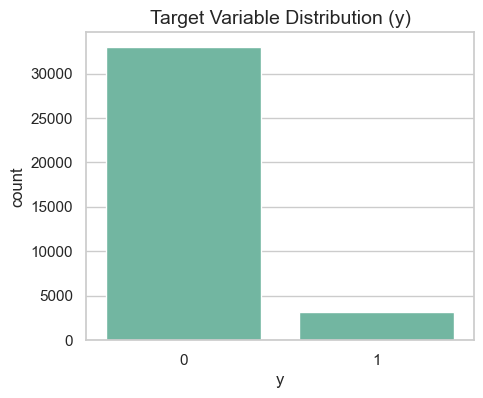

In [10]:
# 1️⃣ plot by y
plt.figure(figsize=(5,4))
sns.countplot(data=df_no_outlier, x='y')
plt.title('Target Variable Distribution (y)', fontsize=14)
plt.show()

so we do not have balance in data so :

In [11]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

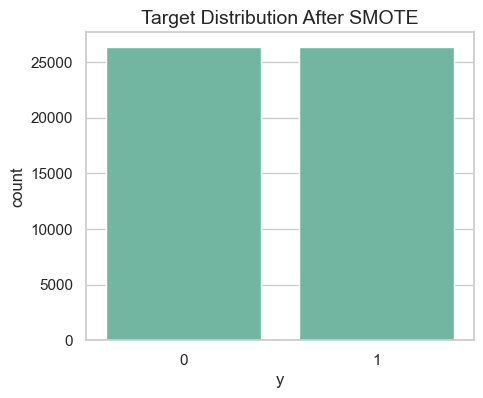

y
0    26377
1    26377
Name: count, dtype: int64


In [12]:
# after MSOTE
plt.figure(figsize=(5,4))
sns.countplot(x=y_train_sm)
plt.title('Target Distribution After SMOTE', fontsize=14)
plt.show()


print(y_train_sm.value_counts())


make a figure for the age :

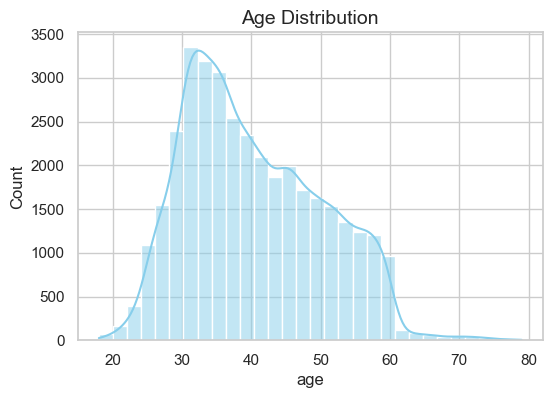

In [13]:

plt.figure(figsize=(6,4))
sns.histplot(data=df_no_outlier, x='age', kde=True, bins=30, color='skyblue')
plt.title('Age Distribution', fontsize=14)
plt.show()

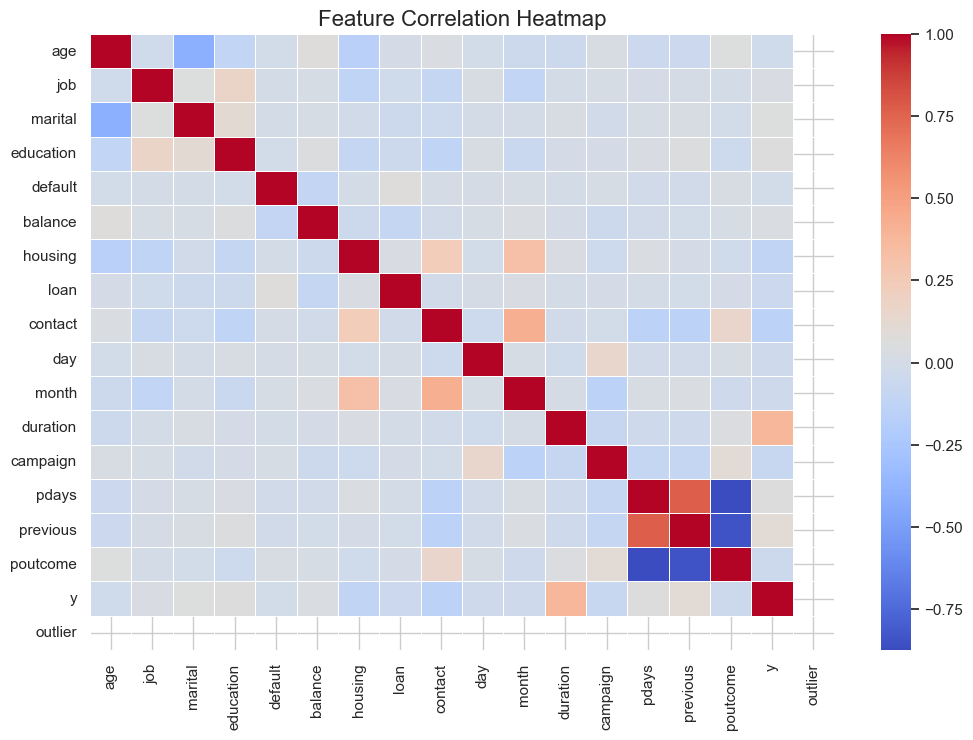

In [14]:
# 3️⃣ Feature Correlation Matrix
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()


use **<span style="font-size:30px;">RandomForest</span>** to find most important feature :

      Feature  Importance
11   duration    0.291783
5     balance    0.124087
0         age    0.115659
10      month    0.105539
9         day    0.103310
1         job    0.055570
12   campaign    0.039808
3   education    0.031137
2     marital    0.025781
8     contact    0.024244
6     housing    0.021745
13      pdays    0.020743
15   poutcome    0.020055
7        loan    0.010631
14   previous    0.007542
4     default    0.002366


C:\Users\p-fr\AppData\Local\Temp\ipykernel_20456\1411881517.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importances, x='Importance', y='Feature', palette='viridis')


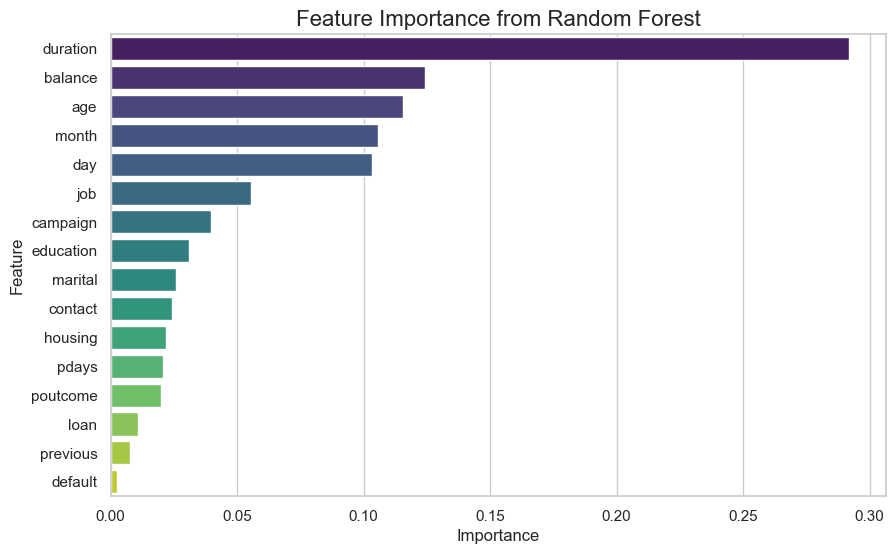

In [15]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# RandomForest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# importance :
importances = rf_model.feature_importances_

# make DataFrame 
feat_importances = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


print(feat_importances)

# plot
plt.figure(figsize=(10,6))
sns.barplot(data=feat_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest', fontsize=16)
plt.show()


In [16]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X_train, y_train)
selected_features = x.columns[selector.get_support()]
print("better f : ", selected_features.tolist())

better f :  ['housing', 'contact', 'duration', 'campaign', 'previous']


start using **<span style="font-size:40px;">GridSearchCV</span>**

In [17]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from scipy import stats
from sklearn.ensemble import IsolationForest
from xgboost import XGBClassifier

In [20]:
models_params = {
    "RandomForest": (
        RandomForestClassifier(random_state=42),
        {"n_estimators": [100, 200], "max_depth": [None, 10, 20]}
    ),
    "XGBoost": (
        XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1),
        {"n_estimators": [100, 200], "max_depth": [3, 6], "learning_rate": [0.05, 0.1]}
    ),
    "GradientBoosting": (
        GradientBoostingClassifier(random_state=42),
        {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1]}
    )
}

In [21]:
results = []
for model_name, (model, params) in models_params.items():
    print(f"🔍 Tuning {model_name} ...")
    grid = GridSearchCV(model, params, cv=3, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train_sm, y_train_sm)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({
        "Model": model_name,
        "Best Params": grid.best_params_,
        "Test Accuracy": acc
    })

🔍 Tuning RandomForest ...
🔍 Tuning XGBoost ...
🔍 Tuning GradientBoosting ...


              Model                                        Best Params  \
1           XGBoost  {'learning_rate': 0.1, 'max_depth': 6, 'n_esti...   
0      RandomForest           {'max_depth': None, 'n_estimators': 200}   
2  GradientBoosting        {'learning_rate': 0.1, 'n_estimators': 200}   

   Test Accuracy  
1       0.919270  
0       0.915123  
2       0.906414  


C:\Users\p-fr\AppData\Local\Temp\ipykernel_20456\2327381735.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Test Accuracy", y="Model", palette="viridis")


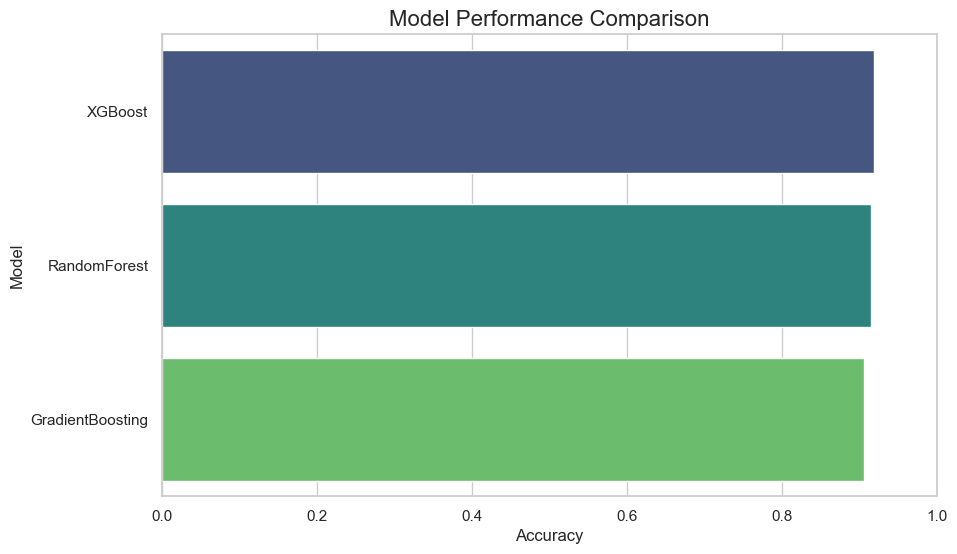

In [22]:
# ------------------------
# 7. Results & Plot
# ------------------------
results_df = pd.DataFrame(results).sort_values(by="Test Accuracy", ascending=False)
print(results_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Test Accuracy", y="Model", palette="viridis")
plt.title("Model Performance Comparison", fontsize=16)
plt.xlabel("Accuracy")
plt.xlim(0, 1)
plt.show()

so we choose **<span style="font-size:30px;">RandomForest</span>** 

In [23]:
# ------------------------
# 8. Use RandomForest for final prediction
# ------------------------

# randomforest best pram:
rf_params = None
for r in results:
    if r['Model'] == "RandomForest":
        rf_params = r["Best Params"]
        break


if rf_params:
    final_rf = RandomForestClassifier(**rf_params, random_state=42)
    final_rf.fit(X_train_sm, y_train_sm)

   
    y_pred_rf = final_rf.predict(X_test)

    acc_rf = accuracy_score(y_test, y_pred_rf)
    print("🎯 RandomForest Test Accuracy:", acc_rf)

    # new predict 
    sample_preds = final_rf.predict(X_test[:5])
    print("🔮 Sample Predictions:", sample_preds)
    print("✅ True Labels:", y_test[:5].values)
else:
    print("❌ No RandomForest parameters found!")


🎯 RandomForest Test Accuracy: 0.9151230301354714
🔮 Sample Predictions: [0 0 0 0 1]
✅ True Labels: [0 0 0 0 1]


if we use **<span style="font-size:30px;">intraction </span>** what happend? 

In [ ]:
# ------------------------
# 0. use intraction 
# ------------------------
df['duration_balance_interaction'] = df['duration'] * df['balance']

# ------------------------
# 1. make X & Y
# ------------------------
X = df.drop(["y","outlier"], axis=1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# ------------------------
# 2. RandomForest 
# ------------------------
rf_best_params = {'n_estimators': 200, 'max_depth': None} 
final_rf = RandomForestClassifier(**rf_best_params, random_state=42)

final_rf.fit(X_train_sm, y_train_sm)
y_pred_rf = final_rf.predict(X_test)

# ------------------------
# 3. new accuracy_score
# ------------------------
acc_rf_new = accuracy_score(y_test, y_pred_rf)
print("🎯 New RandomForest Accuracy with Interaction Feature:", acc_rf_new)


🎯 New RandomForest Accuracy with Interaction Feature: 0.9153995023500138


In [25]:
acc_rf_new > acc_rf


True

this is not really good increase ....so ignore it !

i try to make it better and this is the result :

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from scipy import stats

# ------------------------
# 1. Load data
# ------------------------
df = pd.read_csv(r"D:\pyhton\#\project 1\machin learning\csv\bank-full.csv", sep=";")

# ------------------------
# 2. Remove Outliers with IsolationForest
# ------------------------
num_cols = df.select_dtypes(include=np.number).columns
iso = IsolationForest(contamination=0.2, random_state=42)
df['outlier'] = iso.fit_predict(df[num_cols])
df = df[df['outlier'] == 1].drop(columns='outlier')

# ------------------------
# 3. Label Encoding
# ------------------------
le = LabelEncoder()
for c in df.select_dtypes(include='object'):
    df[c] = le.fit_transform(df[c])

# ------------------------
# 4. Function for modeling
# ------------------------
def train_model(data, add_interaction=False):
    X = data.copy()
    y = X.pop("y")
    
    # Add interaction feature if needed
    if add_interaction:
        X['duration_balance_interaction'] = X['duration'] * X['balance']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # SMOTE
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    # Model
    rf = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    return acc

# ------------------------
# 5. Compare without & with interaction
# ------------------------
acc_no_inter = train_model(df, add_interaction=False)
acc_with_inter = train_model(df, add_interaction=True)

print(f"Accuracy without interaction: {acc_no_inter:.5f}")
print(f"Accuracy with interaction:    {acc_with_inter:.5f}")
print(f"Improvement: {acc_with_inter - acc_no_inter:.6f}")

Accuracy without interaction: 0.91512
Accuracy with interaction:    0.91540
Improvement: 0.000276


# neural network

now let's try to use a neural network to compare it with classic ML:

first importations:

In [28]:

import tensorflow as tf


In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(17,)),              # input features
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # output: 3 classes
])

### compile and train

In [37]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',         # Watch the validation loss
    patience=3,                 # Wait 3 epochs with no improvement
    restore_best_weights=True   # Roll back to the best weights
)
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/20
724/724 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9330 - loss: 0.1576 - val_accuracy: 0.9298 - val_loss: 0.1638
Epoch 2/20
724/724 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9339 - loss: 0.1538 - val_accuracy: 0.9323 - val_loss: 0.1642
Epoch 3/20
724/724 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9345 - loss: 0.1527 - val_accuracy: 0.9279 - val_loss: 0.1680
Epoch 4/20
724/724 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9353 - loss: 0.1504 - val_accuracy: 0.9300 - val_loss: 0.1657


get acc:

In [38]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9176 - loss: 0.1992
Test Accuracy: 0.9176


now lets try it on tensorflow dataset :

make the pandas dataset to a tensoflow one :

In [39]:
train_dataset = (
    tf.data.Dataset.from_tensor_slices((X_train, y_train))
    .shuffle(len(X_train))
    .batch(16)
    .prefetch(tf.data.AUTOTUNE)
)

In [40]:
test_dataset = (
    tf.data.Dataset.from_tensor_slices((X_test, y_test))
    .batch(16)
    .prefetch(tf.data.AUTOTUNE)
)

In [42]:

history = model.fit(
    train_dataset,validation_data=test_dataset,
    epochs=20,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/20
1809/1809 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9306 - loss: 0.1637 - val_accuracy: 0.9198 - val_loss: 0.1988
Epoch 2/20
1809/1809 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9318 - loss: 0.1599 - val_accuracy: 0.9175 - val_loss: 0.1995
Epoch 3/20
1809/1809 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9331 - loss: 0.1582 - val_accuracy: 0.9142 - val_loss: 0.2046


In [43]:
loss, acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {acc:.4f}")

453/453 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9198 - loss: 0.1988
Test Accuracy: 0.9198


it can increase the acc a little ! 

In [48]:
acc_lst=[acc_no_inter , acc , acc_with_inter]

print(max (acc_lst))

0.9198230504989624


so the best acc is for:
### `neural network`

# save 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import joblib
from scipy.stats import ttest_rel
import numpy as np

# save 
joblib.dump(acc_with_inter, "final_rf_model_with_interaction.joblib")



print("✅ Model and t-test results saved successfully!")